#Lab 1 - EE379K Data Science Lab 9/11/17
###Rachel Chen and Kevin Yee
###Programming Questions
1. Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5.
Create another 1000 samples from another independent Gaussian with mean 10 and standard
deviation 5.
(a) Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point,
and plot the histogram of the resulting 1000 points. What do you observe?
(b) Estimate the mean and the variance of the sum.
2. Central Limit Theorem. Let Xi be an iid Bernoulli random variable with value {-1,1}.
Look at the random variable Zn =
1
n
PXi
. By taking 1000 draws from Zn, plot its histogram.
Check that for small n (say, 5-10) Zn does not look that much like a Gaussian, but when n
is bigger (already by the time n = 30 or 50) it looks much more like a Gaussian. Check also
for much bigger n: n = 250, to see that at this point, one can really see the bell curve.
3. Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples
from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean
and standard deviation of this gaussian using elementary numpy commands, i.e., addition,
multiplication, division (do not use a command that takes data and returns the mean or
standard deviation).
4. Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples
of 2 dimensional data from the Gaussian distribution

Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary
numpy commands, i.e., addition, multiplication, division (do not use a command that
takes data and returns the mean or standard deviation).
5. Download from Canvas/Files the dataset PatientData.csv.


In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#Problem 1
X = np.random.normal(-10, 5, 1000)
Y = np.random.normal(10, 5, 1000)
Z = np.add(X,Y)
#https://stackoverflow.com/questions/38747612/whats-the-difference-between-numpy-adda-b-and-ab

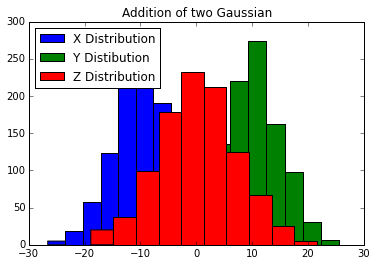

In [54]:
plt.title("Addition of two Gaussian")

plt.hist(X, label ='X Distribution')
plt.hist(Y, label = 'Y Distibution')
plt.hist(Z, label = 'Z Distribution')
plt.legend(loc = 'upper left')


In [55]:
print "The mean is",
print("%.2f" % np.mean(Z))
print "The variance is",
print("%.2f" % np.var(Z))

The mean is 0.23
The variance is 48.26


####Problem 1 Observations:
The sum of 2 independent Gaussians results in a Gaussian with the sum of the two means and sum of two variances.
i.e. given
$$X: N(\mu_x,\theta^2_x)$$
$$Y: N(\mu_y, \theta^2_y)$$
$$Z = X + Y$$

$$Z: N(\mu_x + \mu_y, \theta^2_x + \theta^2_y)$$

(array([ 507.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  493.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

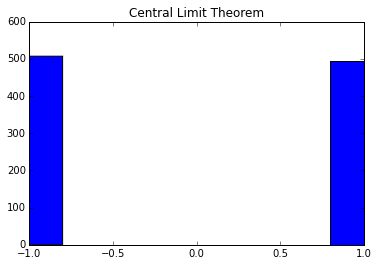

In [62]:
#Problem 2
trials = []
for i in range(1000):
    x = np.random.binomial(1, 0.5); #bernoulli
    trials.append(1) if x == 1 else trials.append(-1);
plt.title("Central Limit Theorem")
plt.hist(trials)